In [2]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import yfinance as yfin
import matplotlib.pyplot as plt

In [26]:
import pandas as pd
import pandas_datareader.data as web

# Specify the start and end dates for the data
sd1="2000-01-01"
ed1="2022-12-12"
start_date1 = datetime.datetime.strptime(sd1, '%Y-%m-%d')
end_date1 = datetime.datetime.strptime(ed1, '%Y-%m-%d')

# Get the NIFTY 50 data from Google Finance
nifty_50 = web.get_data_google('^NSEI',start=start_date1,end=end_date1)

# Print the first 5 rows of the data
print(nifty_50.head())



AttributeError: module 'pandas_datareader.data' has no attribute 'get_data_google'

In [3]:
start_date = datetime.datetime(2000,1,1)
end_date = datetime.datetime(2022,12,12)
# Get the NIFTY 50 data from Google Finance
yfin.pdr_override()

nifty_50 = web.get_data_yahoo('^NSEI',start=start_date,end=end_date)



# Print the first 5 rows of the data
print(nifty_50.head())


[*********************100%***********************]  1 of 1 completed
                                  Open         High          Low        Close  \
Date                                                                            
2007-09-17 00:00:00+05:30  4518.450195  4549.049805  4482.850098  4494.649902   
2007-09-18 00:00:00+05:30  4494.100098  4551.799805  4481.549805  4546.200195   
2007-09-19 00:00:00+05:30  4550.250000  4739.000000  4550.250000  4732.350098   
2007-09-20 00:00:00+05:30  4734.850098  4760.850098  4721.149902  4747.549805   
2007-09-21 00:00:00+05:30  4752.950195  4855.700195  4733.700195  4837.549805   

                             Adj Close  Volume  
Date                                            
2007-09-17 00:00:00+05:30  4494.649902       0  
2007-09-18 00:00:00+05:30  4546.200195       0  
2007-09-19 00:00:00+05:30  4732.350098       0  
2007-09-20 00:00:00+05:30  4747.549805       0  
2007-09-21 00:00:00+05:30  4837.549805       0  


In [4]:
start_date1 = datetime.datetime(2000,1,1)
end_date1 = datetime.datetime(2022,12,12)
# Get the NIFTY 50 data from Google Finance
yfin.pdr_override()

hsi = web.get_data_yahoo('^HSI',start=start_date,end=end_date)


# Fetch the data using the pandas_datareader library
#csi1000 = pdr.DataReader('000300.SS', 'yahoo', start_date, end_date)

# Display the first five rows of the data
print(hsi.head())


[*********************100%***********************]  1 of 1 completed
                                   Open          High           Low  \
Date                                                                  
2000-01-03 00:00:00+08:00  17057.699219  17426.160156  17057.699219   
2000-01-04 00:00:00+08:00  17303.000000  17303.000000  16933.519531   
2000-01-05 00:00:00+08:00  16608.550781  16608.550781  15688.490234   
2000-01-06 00:00:00+08:00  15942.070312  15971.030273  14763.969727   
2000-01-07 00:00:00+08:00  15329.339844  15513.889648  15108.750000   

                                  Close     Adj Close  Volume  
Date                                                           
2000-01-03 00:00:00+08:00  17369.630859  17369.630859       0  
2000-01-04 00:00:00+08:00  17072.820312  17072.820312       0  
2000-01-05 00:00:00+08:00  15846.719727  15846.719727       0  
2000-01-06 00:00:00+08:00  15153.230469  15153.230469       0  
2000-01-07 00:00:00+08:00  15405.629883  15405.62

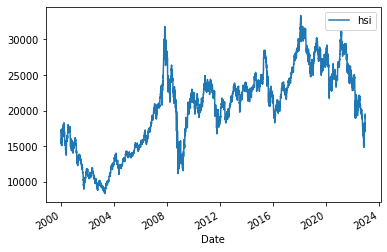

In [49]:
hsi['Open'].plot(label="hsi")
plt.legend()
plt.show()


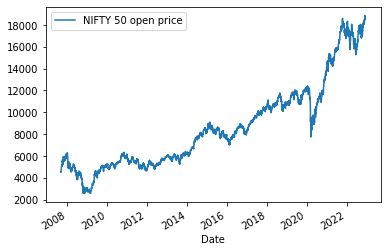

In [48]:
nifty_50['Open'].plot(label="NIFTY 50 open price")
plt.legend()

plt.show()


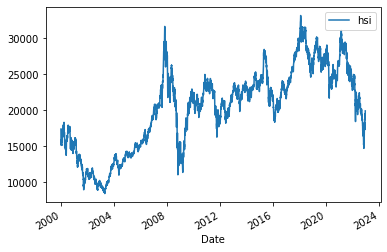

In [47]:
hsi['Close'].plot(label="hsi")
plt.legend()
plt.show()

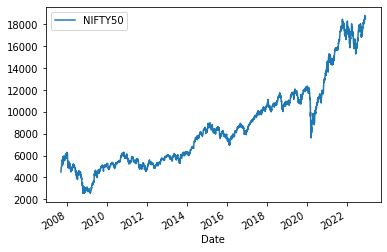

In [46]:
nifty_50['Close'].plot(label="NIFTY50")
plt.legend()
plt.show()

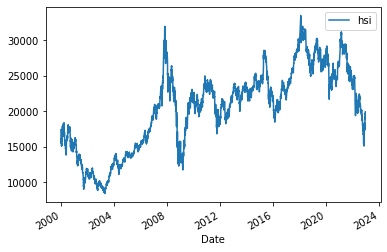

In [45]:
hsi['High'].plot(label="hsi")
plt.legend()
plt.show()

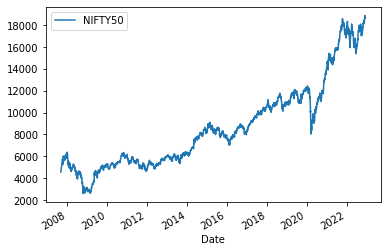

In [44]:
nifty_50['High'].plot(label="NIFTY50")
plt.legend()
plt.show()

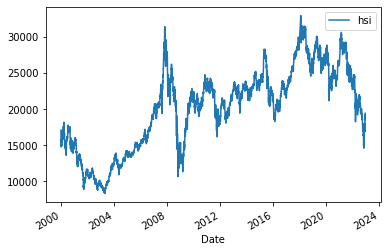

In [43]:
hsi['Low'].plot(label="hsi")
plt.legend()
plt.show()

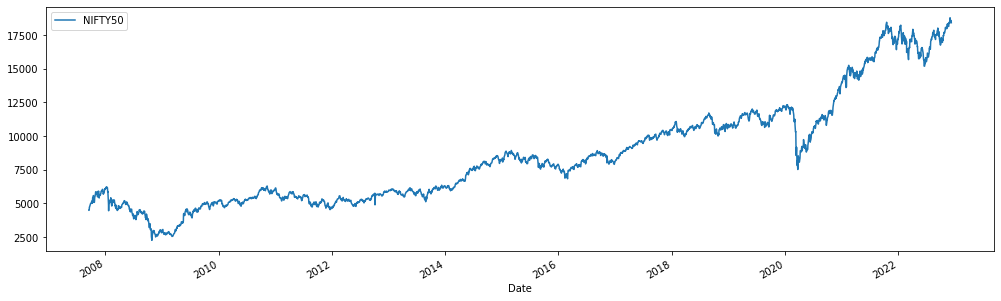

In [50]:
nifty_50['Low'].plot(label="NIFTY50",figsize=(17,5))
plt.legend()
plt.show()

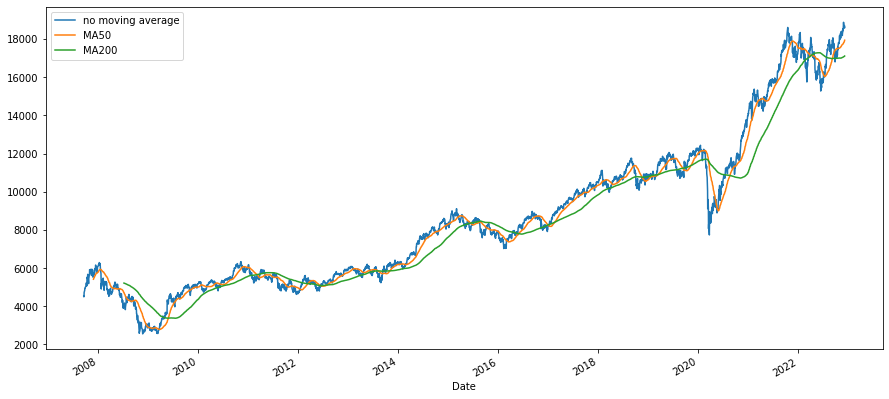

In [52]:
nifty_50['Open'].plot(label="no moving average", figsize=(15,7))
nifty_50['MA50']=nifty_50['Open'].rolling(50).mean()
nifty_50['MA50'].plot(label="MA50")
nifty_50['MA200']=nifty_50['Open'].rolling(200).mean()
nifty_50['MA200'].plot(label="MA200")
plt.legend()

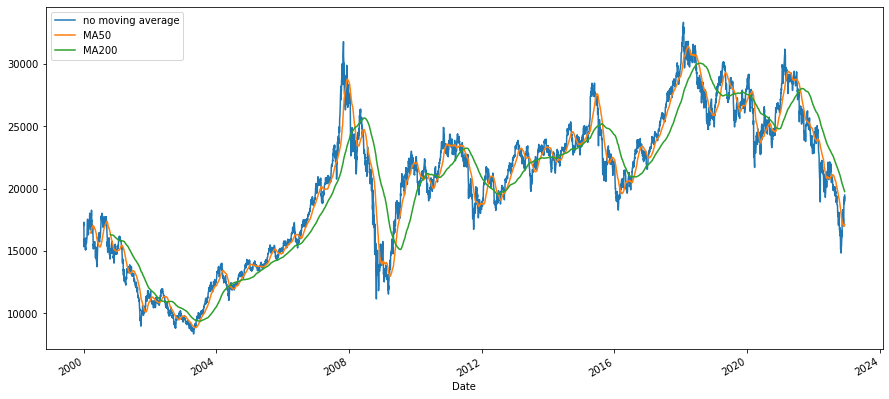

In [53]:
hsi['Open'].plot(label="no moving average", figsize=(15,7))
hsi['MA50']=hsi['Open'].rolling(50).mean()
hsi['MA50'].plot(label="MA50")
hsi['MA200']=hsi['Open'].rolling(200).mean()
hsi['MA200'].plot(label="MA200")
plt.legend()

In [54]:
from pandas.plotting import scatter_matrix
import pandas as pd


In [58]:
economy=pd.concat([nifty_50['Open'],hsi['Open']],axis=1)
economy.columns=["NIFTY50 Open","HSI Open"]

array([[<AxesSubplot:xlabel='NIFTY50 Open', ylabel='NIFTY50 Open'>,
        <AxesSubplot:xlabel='HSI Open', ylabel='NIFTY50 Open'>],
       [<AxesSubplot:xlabel='NIFTY50 Open', ylabel='HSI Open'>,
        <AxesSubplot:xlabel='HSI Open', ylabel='HSI Open'>]], dtype=object)

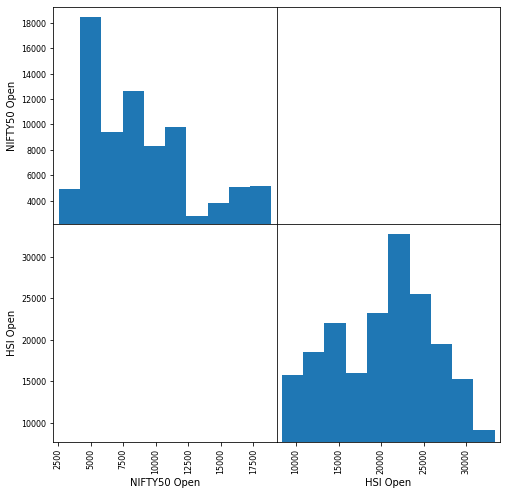

In [61]:
#coreelation between random variables. stock prices are your random variables
#simply covariance matrix of large data
scatter_matrix(economy,figsize=(8,8)) 

In [62]:
#daily percentage change
#rt=(Pt/P(t-1))-1
nifty_50['returns']=(nifty_50['Close']/nifty_50['Close'].shift(1))-1
hsi['returns']=(hsi['Close']/hsi['Close'].shift(1))-1


In [63]:
nifty_50.head()

,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,returns
Date,,,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0,NaN,NaN,NaN
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0,NaN,NaN,0.011469
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0,NaN,NaN,0.040946
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0,NaN,NaN,0.003212
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0,NaN,NaN,0.018957


In [64]:
hsi.head()

,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,returns
Date,,,,,,,,,
2000-01-03 00:00:00+08:00,17057.699219,17426.160156,17057.699219,17369.630859,17369.630859,0,NaN,NaN,NaN
2000-01-04 00:00:00+08:00,17303.000000,17303.000000,16933.519531,17072.820312,17072.820312,0,NaN,NaN,-0.017088
2000-01-05 00:00:00+08:00,16608.550781,16608.550781,15688.490234,15846.719727,15846.719727,0,NaN,NaN,-0.071816
2000-01-06 00:00:00+08:00,15942.070312,15971.030273,14763.969727,15153.230469,15153.230469,0,NaN,NaN,-0.043762
2000-01-07 00:00:00+08:00,15329.339844,15513.889648,15108.750000,15405.629883,15405.629883,0,NaN,NaN,0.016656


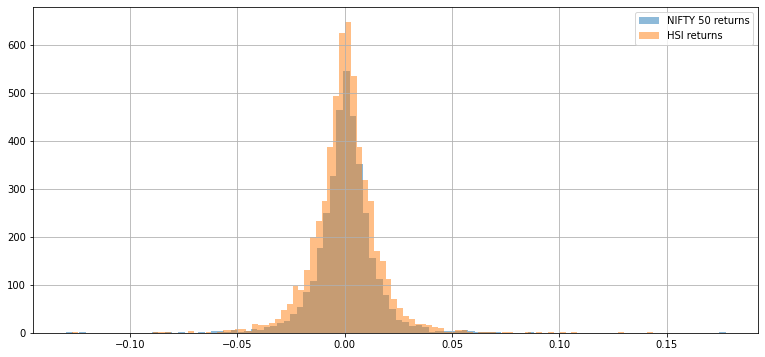

In [71]:
#histograms
nifty_50['returns'].hist(bins=100,alpha=0.5,label="NIFTY 50 returns",figsize=(13,6))
hsi['returns'].hist(bins=100,alpha=0.50,label="HSI returns")
plt.legend()

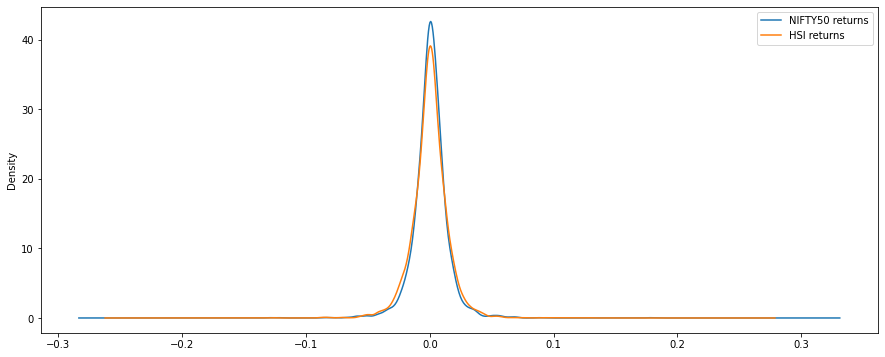

In [72]:
nifty_50['returns'].plot(kind='kde',label="NIFTY50 returns",figsize=(15,6))
hsi['returns'].plot(kind='kde',label="HSI returns",figsize=(15,6))
plt.legend()

Text(0.5, 1.0, 'Cumulative return vs time')

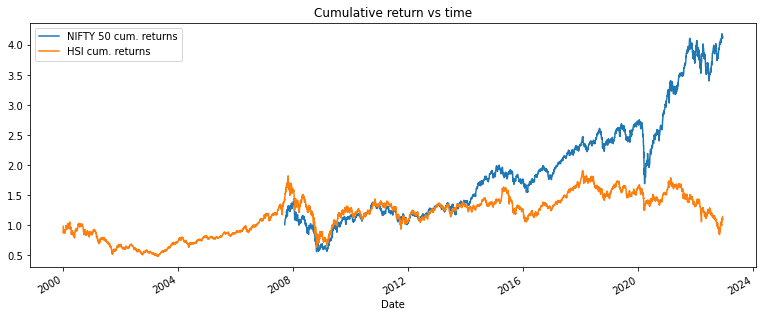

In [76]:
#cumulative return
#formula: It=(1+rt)i(t-1)

nifty_50["cumulative returns"]=(1+nifty_50['returns']).cumprod()
hsi["cumulative returns"]=(1+hsi['returns']).cumprod()
nifty_50["cumulative returns"].plot(label="NIFTY 50 cum. returns", figsize=(13,5))
hsi["cumulative returns"].plot(label="HSI cum. returns", figsize=(13,5))
plt.legend()
plt.title("Cumulative return vs time")

In [7]:
import numpy as np
std_dev = np.std(nifty_50['Close'])
std_dev
std_dev


3925.731829118365

In [9]:
std_devc = np.std(hsi['Close'])
std_devc

5703.734685530006

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


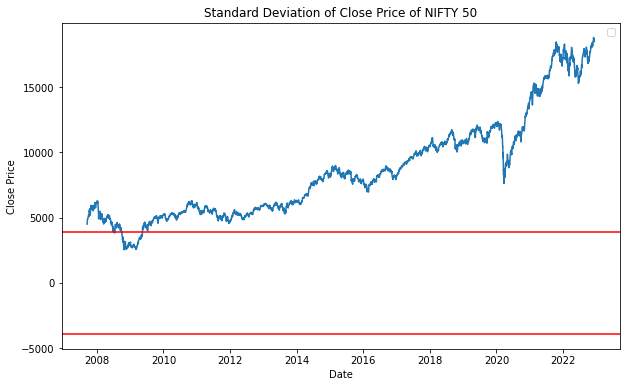

In [13]:
plt.figure(figsize=(10,6))
plt.title('Standard Deviation of Close Price of NIFTY 50')
plt.plot(nifty_50['Close'])
plt.axhline(y=std_dev, color='r', linestyle='-')
plt.axhline(y=-std_dev, color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


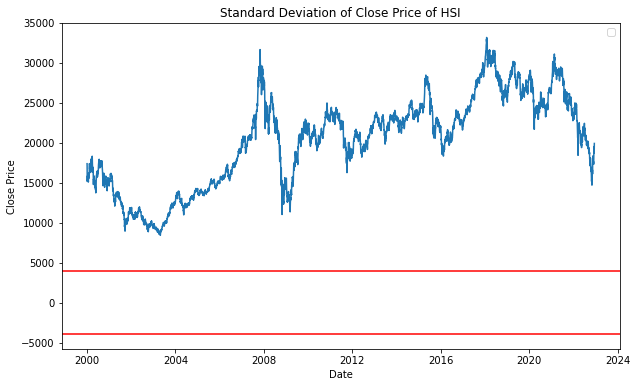

In [14]:
plt.figure(figsize=(10,6))
plt.title('Standard Deviation of Close Price of HSI')
plt.plot(hsi['Close'])
plt.axhline(y=std_dev, color='r', linestyle='-')
plt.axhline(y=-std_dev, color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()

In [21]:

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(nifty_50['Close'].values.reshape(-1,1))

prediction_days = 365

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Prepare the test dataset
test_data = scaled_data[-prediction_days:]
x_test = []

x_test.append(test_data[:, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predict future stock prices
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

print(predicted_price)

2023-04-12 12:51:03.423322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-12 12:51:03.425472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-12 12:51:03.431335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2023-04-12 12:51:04.522537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-12 12:51:04.525636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-12 12:51:04.527583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

106/106 [==============================] - 72s 533ms/step - loss: 0.0090
Epoch 2/50
106/106 [==============================] - 46s 436ms/step - loss: 3.8617e-04
Epoch 3/50
106/106 [==============================] - 45s 425ms/step - loss: 3.7009e-04
Epoch 4/50
106/106 [==============================] - 52s 494ms/step - loss: 3.7315e-04
Epoch 5/50
106/106 [==============================] - 59s 553ms/step - loss: 4.1501e-04
Epoch 6/50
106/106 [==============================] - 47s 441ms/step - loss: 3.2223e-04
Epoch 7/50
106/106 [==============================] - 49s 463ms/step - loss: 3.1112e-04
Epoch 8/50
106/106 [==============================] - 51s 480ms/step - loss: 3.0854e-04
Epoch 9/50
106/106 [==============================] - 50s 468ms/step - loss: 3.4778e-04
Epoch 10/50
106/106 [==============================] - 45s 426ms/step - loss: 3.1907e-04
Epoch 11/50
106/106 [==============================] - 45s 423ms/step - loss: 2.8002e-04
Epoch 12/50
106/106 [========================

2023-04-12 17:00:17.547078: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-12 17:00:17.550291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-12 17:00:17.552600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 1s/step
[[18474.117]]


In [8]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(hsi['Close'].values.reshape(-1,1))

prediction_days = 365

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Prepare the test dataset
test_data = scaled_data[-prediction_days:]
x_test = []

x_test.append(test_data[:, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predict future stock prices
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

print(predicted_price)

2023-04-14 10:33:06.888926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 10:33:06.891474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 10:33:06.893314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2023-04-14 10:33:07.542958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 10:33:07.545591: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 10:33:07.547410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

166/166 [==============================] - 87s 481ms/step - loss: 0.0092
Epoch 2/50
166/166 [==============================] - 70s 424ms/step - loss: 9.7140e-04
Epoch 3/50
166/166 [==============================] - 82s 496ms/step - loss: 8.2667e-04
Epoch 4/50
166/166 [==============================] - 97s 587ms/step - loss: 7.3966e-04
Epoch 5/50
166/166 [==============================] - 89s 534ms/step - loss: 6.9249e-04
Epoch 6/50
166/166 [==============================] - 78s 467ms/step - loss: 5.8736e-04
Epoch 7/50
166/166 [==============================] - 70s 423ms/step - loss: 5.2356e-04
Epoch 8/50
166/166 [==============================] - 75s 454ms/step - loss: 4.9477e-04
Epoch 9/50
166/166 [==============================] - 79s 476ms/step - loss: 4.2371e-04
Epoch 10/50
166/166 [==============================] - 77s 466ms/step - loss: 3.7093e-04
Epoch 11/50
141/166 [========================>.....] - ETA: 12s - loss: 3.5793e-04

KeyboardInterrupt: 

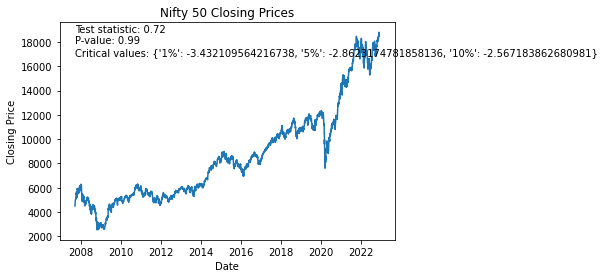

In [37]:
from statsmodels.tsa.stattools import adfuller


# Extract the closing prices from the data
closing_prices = nifty_50['Close']

# Perform the ADF test on the closing prices
adf_test_results = adfuller(closing_prices)

# Extract the test statistic, p-value, and critical values from the test results
test_statistic = adf_test_results[0]
p_value = adf_test_results[1]
critical_values = adf_test_results[4]

# Plot the closing prices and add the ADF test results to the plot
plt.plot(closing_prices)
plt.title('Nifty 50 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.text(closing_prices.index[0], closing_prices.max()*0.9, f'Test statistic: {test_statistic:.2f}\n'
                                                         f'P-value: {p_value:.2f}\n'
                                                         f'Critical values: {critical_values}')
plt.show()

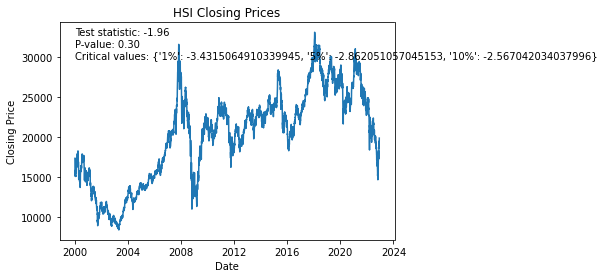

In [40]:
from statsmodels.tsa.stattools import adfuller


# Extract the closing prices from the data
closing_prices = hsi['Close']

# Perform the ADF test on the closing prices
adf_test_results = adfuller(closing_prices)

# Extract the test statistic, p-value, and critical values from the test results
test_statistic = adf_test_results[0]
p_value = adf_test_results[1]
critical_values = adf_test_results[4]

# Plot the closing prices and add the ADF test results to the plot
plt.plot(closing_prices)
plt.title('HSI Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.text(closing_prices.index[0], closing_prices.max()*0.9, f'Test statistic: {test_statistic:.2f}\n'
                                                         f'P-value: {p_value:.2f}\n'
                                                         f'Critical values: {critical_values}')
plt.show()

In [70]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Load the Nifty 50 data
#df = nifty_50

# Convert the date column to a datetime format
#nifty_50['Date'] = pd.to_datetime(nifty_50['Date'])

# Set the date column as the index
#nifty_50.set_index('Date', inplace=True)

# Create a new column with the log returns
nifty_50['log_returns'] = np.log(nifty_50['Close']) - np.log(nifty_50['Close'].shift(1))

# Remove the first row with NaN values
nifty_50.dropna(inplace=True)
#nifty_50[['log_returns']].isna().sum()

#nifty_50[['log_returns']].fillna(method='ffill', inplace=True)
print(nifty_50['log_returns'])
data = nifty_50[['log_returns']].values.reshape(-1, 1)

print(data)
print(data.shape)

# Perform a Johansen cointegration test to check for the presence of a long-run relationship
coint_test = coint_johansen(data, det_order=0, k_ar_diff=1)
trace_stat = coint_test.trace_stat[0]
crit_val_90 = coint_test.trace_stat_crit_vals[1]

if trace_stat > crit_val_90:
    print("The Johansen cointegration test suggests that there is a long-run relationship between the variables.")
else:
    print("The Johansen cointegration test suggests that there is no long-run relationship between the variables.")

# Perform an augmented Dickey-Fuller (ADF) test to check for stationarity
adf_result = adfuller(nifty_50['log_returns'])
p_value = adf_result[1]

if p_value < 0.05:
    print("The ADF test suggests that the log returns are stationary.")
else:
    print("The ADF test suggests that the log returns are non-stationary.")

# Perform a VAR model on the log returns
model = VAR(nifty_50[['log_returns']])
results = model.fit()

# Perform a structural break test using the BIC statistic
bics = []
for i in range(1, len(nifty_50)):
    model1 = VAR(nifty_50[['log_returns']].iloc[:i])
    results1 = model1.fit()
    bic1 = results1.bic
    
    model2 = VAR(nifty_50[['log_returns']].iloc[i:])
    results2 = model2.fit()
    bic2 = results2.bic
    
    bics.append(bic1 + bic2)
    
min_bic_idx = np.argmin(bics)
break_date = nifty_50.index[min_bic_idx]

# Plot the Nifty 50 data with the structural break indicated
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(nifty_50.index, nifty_50['Close'], label='Nifty 50')
ax.axvline(x=break_date, color='r', linestyle='--', label='Structural break')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price')
ax.set_title('Nifty 50 with structural break')
ax.legend()
plt.show()


Date
2007-09-28 00:00:00+05:30    0.004151
2007-10-01 00:00:00+05:30    0.009435
2007-10-03 00:00:00+05:30    0.027600
2007-10-04 00:00:00+05:30   -0.000413
2007-10-05 00:00:00+05:30   -0.004387
                               ...   
2022-12-05 00:00:00+05:30    0.000265
2022-12-06 00:00:00+05:30   -0.003122
2022-12-07 00:00:00+05:30   -0.004422
2022-12-08 00:00:00+05:30    0.002628
2022-12-09 00:00:00+05:30   -0.006077
Name: log_returns, Length: 3723, dtype: float64
[[ 0.00415097]
 [ 0.00943489]
 [ 0.02759962]
 ...
 [-0.00442166]
 [ 0.00262845]
 [-0.00607721]]
(3723, 1)


LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.breakpoint_detection import (Bartlett, ChowTest)
import matplotlib.pyplot as plt

# Load Nifty50 data
nifty50_data = pd.read_csv('nifty50.csv')

# Extract the close price column
close_price = nifty50_data['Close']

# Define the breakpoint location
breakpoint_location = len(close_price) // 2

# Split the data into two segments
segment_1 = close_price[:breakpoint_location]
segment_2 = close_price[breakpoint_location:]

# Fit an OLS regression on each segment
ols_segment_1 = OLS(segment_1, np.ones(len(segment_1))).fit()
ols_segment_2 = OLS(segment_2, np.ones(len(segment_2))).fit()

# Perform the Chow test
chow_test = ChowTest(np.arange(len(close_price)), close_price, [breakpoint_location])
chow_test.summary()

# Plot the data and breakpoint
plt.plot(close_price)
plt.axvline(x=breakpoint_location, color='red')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the data
prices = nifty_50['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(prices.reshape(-1,1))

# Define the number of time steps and split the data into training and testing sets
n_steps = 60
train_data = scaled_data[:3000]
test_data = scaled_data[3000:]


# Define the function to create input sequences and labels for the LSTM model
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create the input sequences and labels for the training and testing sets
X_train, y_train = create_sequences(train_data, n_steps)
X_test, y_test = create_sequences(test_data, n_steps)



# Reshape the input sequences for the LSTM model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

#X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(n_steps,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predict the closing prices for the next 365 days
n_days = 365
n_test_samples = test_data.shape[0]
test_predictions = []
current_sample = X_test[0]
for i in range(n_days):
    # Reshape the current sample for the LSTM model
    current_sample = current_sample.reshape((1, n_steps, 1))
    # Predict the next closing price and add it to the test predictions list
    next_prediction = model.predict(current_sample)[0][0]
    test_predictions.append(next_prediction)
    # Update the current sample with the new prediction
    current_sample = np.concatenate((current_sample[:,1:,:], [[next_prediction]]), axis=1)

# Denormalize the predicted prices
test_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1,1))

# Plot the predicted prices
plt.figure(figsize=(16,8))
plt.plot(test_predictions)
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.title('Predicted Nifty 50 Closing Prices for Next 365 Days')
plt.show()


1/1 [==============================] - 0s 31ms/step


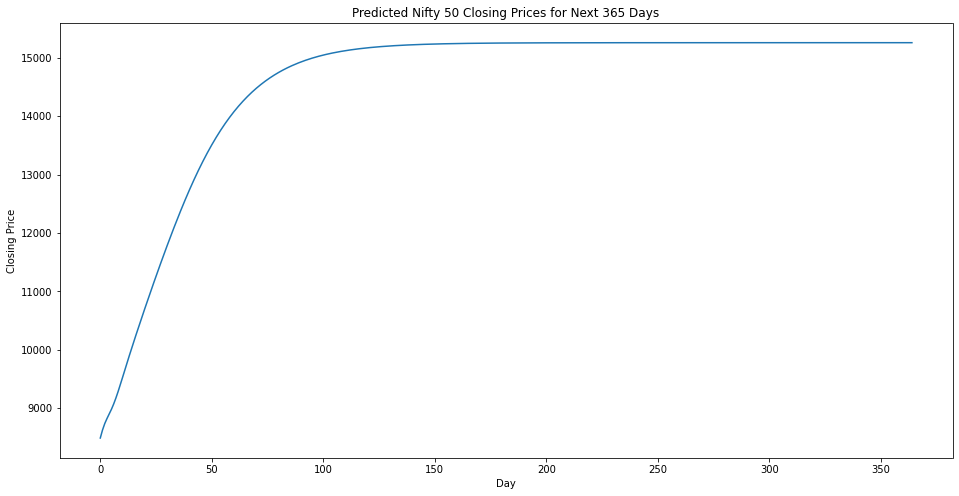

In [33]:
n_days = 365
n_test_samples = test_data.shape[0]
test_predictions = []
current_sample = X_test[0]
for i in range(n_days):
    # Reshape the current sample for the LSTM model
    current_sample = current_sample.reshape((1, n_steps,1))
    # Predict the next closing price and add it to the test predictions list
    next_prediction = model.predict(current_sample)[0][0]
    test_predictions.append(next_prediction)
    # Update the current sample with the new prediction
    current_sample=np.reshape(current_sample,(1,n_steps))
    current_sample = np.concatenate((current_sample[:,1:], [[next_prediction]]), axis=1)

# Denormalize the predicted prices
test_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1,1))

# Plot the predicted prices
plt.figure(figsize=(16,8))
plt.plot(test_predictions)
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.title('Predicted Nifty 50 Closing Prices for Next 365 Days')
plt.show()


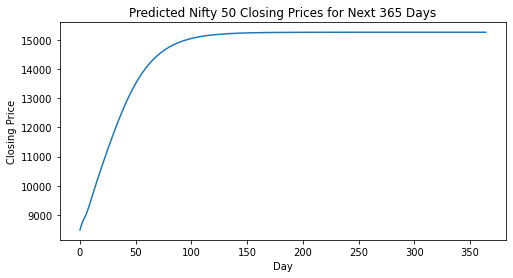

In [34]:
plt.figure(figsize=(8,4))
plt.plot(test_predictions)
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.title('Predicted Nifty 50 Closing Prices for Next 365 Days')
plt.show()

2023-04-14 14:21:01.042168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 14:21:01.044624: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 14:21:01.046564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-04-14 14:21:01.650633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 14:21:01.652937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 14:21:01.656797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

92/92 [==============================] - 15s 82ms/step - loss: 0.0081
Epoch 2/100
92/92 [==============================] - 8s 86ms/step - loss: 0.0011
Epoch 3/100
92/92 [==============================] - 7s 74ms/step - loss: 9.2801e-04
Epoch 4/100
92/92 [==============================] - 7s 75ms/step - loss: 8.8908e-04
Epoch 5/100
92/92 [==============================] - 7s 73ms/step - loss: 7.7948e-04
Epoch 6/100
92/92 [==============================] - 7s 74ms/step - loss: 6.7911e-04
Epoch 7/100
92/92 [==============================] - 7s 74ms/step - loss: 6.2979e-04
Epoch 8/100
92/92 [==============================] - 7s 74ms/step - loss: 5.6268e-04
Epoch 9/100
92/92 [==============================] - 7s 75ms/step - loss: 5.3861e-04
Epoch 10/100
92/92 [==============================] - 7s 74ms/step - loss: 4.9148e-04
Epoch 11/100
92/92 [==============================] - 7s 74ms/step - loss: 4.9434e-04
Epoch 12/100
92/92 [==============================] - 7s 75ms/step - loss: 4.8364e

2023-04-14 14:32:58.074231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 14:32:58.076760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 14:32:58.078274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 38ms/step


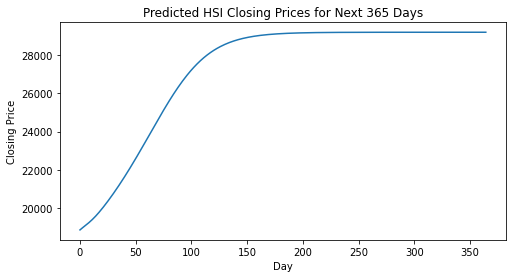

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the data
prices = hsi['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(prices.reshape(-1,1))

# Define the number of time steps and split the data into training and testing sets
n_steps = 60
train_data = scaled_data[:3000]
test_data = scaled_data[3000:]


# Define the function to create input sequences and labels for the LSTM model
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create the input sequences and labels for the training and testing sets
X_train, y_train = create_sequences(train_data, n_steps)
X_test, y_test = create_sequences(test_data, n_steps)



# Reshape the input sequences for the LSTM model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

#X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(n_steps,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

n_days = 365
n_test_samples = test_data.shape[0]
test_predictions = []
current_sample = X_test[0]
for i in range(n_days):
    # Reshape the current sample for the LSTM model
    current_sample = current_sample.reshape((1, n_steps,1))
    # Predict the next closing price and add it to the test predictions list
    next_prediction = model.predict(current_sample)[0][0]
    test_predictions.append(next_prediction)
    # Update the current sample with the new prediction
    current_sample=np.reshape(current_sample,(1,n_steps))
    current_sample = np.concatenate((current_sample[:,1:], [[next_prediction]]), axis=1)

# Denormalize the predicted prices
test_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1,1))
# Plot the predicted prices
plt.figure(figsize=(8,4))
plt.plot(test_predictions)
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.title('Predicted HSI Closing Prices for Next 365 Days')
plt.show()


In [36]:
test_predictions


array([[18854.115],
       [18905.537],
       [18952.85 ],
       [18999.   ],
       [19045.066],
       [19091.396],
       [19138.312],
       [19186.201],
       [19235.451],
       [19286.418],
       [19339.357],
       [19394.436],
       [19451.723],
       [19511.22 ],
       [19572.865],
       [19636.562],
       [19702.184],
       [19769.598],
       [19838.664],
       [19909.258],
       [19981.264],
       [20054.576],
       [20129.117],
       [20204.807],
       [20281.594],
       [20359.43 ],
       [20438.28 ],
       [20518.113],
       [20598.916],
       [20680.666],
       [20763.352],
       [20846.957],
       [20931.47 ],
       [21016.89 ],
       [21103.197],
       [21190.387],
       [21278.445],
       [21367.355],
       [21457.113],
       [21547.705],
       [21639.11 ],
       [21731.31 ],
       [21824.295],
       [21918.041],
       [22012.53 ],
       [22107.74 ],
       [22203.654],
       [22300.238],
       [22397.47 ],
       [22495.32 ],


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the data
prices = nifty_50['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(prices.reshape(-1,1))

# Define the number of time steps and split the data into training and testing sets
n_steps = 60
train_data = scaled_data[:3000]
test_data = scaled_data[3000:]


# Define the function to create input sequences and labels for the LSTM model
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create the input sequences and labels for the training and testing sets
X_train, y_train = create_sequences(train_data, n_steps)
X_test, y_test = create_sequences(test_data, n_steps)



# Reshape the input sequences for the LSTM model

3000
[[[0.12097333]
  [0.1241382 ]
  [0.13556664]
  ...
  [0.21181461]
  [0.21097353]
  [0.21936298]]

 [[0.1241382 ]
  [0.13556664]
  [0.13649981]
  ...
  [0.21097353]
  [0.21936298]
  [0.22317245]]

 [[0.13556664]
  [0.13649981]
  [0.14202525]
  ...
  [0.21936298]
  [0.22317245]
  [0.21695942]]

 ...

 [[0.54738679]
  [0.55542937]
  [0.55181943]
  ...
  [0.59844182]
  [0.59788621]
  [0.59492702]]

 [[0.55542937]
  [0.55181943]
  [0.54948952]
  ...
  [0.59788621]
  [0.59492702]
  [0.58952437]]

 [[0.55181943]
  [0.54948952]
  [0.54245688]
  ...
  [0.59492702]
  [0.58952437]
  [0.59684558]]]
732
[[[0.59209679]
  [0.59295936]
  [0.59908033]
  ...
  [0.31225174]
  [0.32396566]
  [0.35569394]]

 [[0.59295936]
  [0.59908033]
  [0.59566992]
  ...
  [0.32396566]
  [0.35569394]
  [0.375561  ]]

 [[0.59908033]
  [0.59566992]
  [0.5813283 ]
  ...
  [0.35569394]
  [0.375561  ]
  [0.37671519]]

 ...

 [[0.93988627]
  [0.94620983]
  [0.95441825]
  ...
  [0.99285374]
  [0.99315771]
  [0.98957841]]


In [5]:
import pandas as pd
import numpy as np
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.breakpoint_detection import (Bartlett, ChowTest)
import matplotlib.pyplot as plt

# Load Nifty50 data


# Extract the close price column
close_price = nifty_50['Close']

# Define the breakpoint location
breakpoint_location = len(close_price) // 2

# Split the data into two segments
segment_1 = close_price[:breakpoint_location]
segment_2 = close_price[breakpoint_location:]

# Fit an OLS regression on each segment
ols_segment_1 = OLS(segment_1, np.ones(len(segment_1))).fit()
ols_segment_2 = OLS(segment_2, np.ones(len(segment_2))).fit()

# Perform the Chow test
chow_test = ChowTest(np.arange(len(close_price)), close_price, [breakpoint_location])
chow_test.summary()

# Plot the data and breakpoint
plt.plot(close_price)
plt.axvline(x=breakpoint_location, color='red')
plt.show()


ModuleNotFoundError: No module named 'statsmodels.stats.breakpoint_detection'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


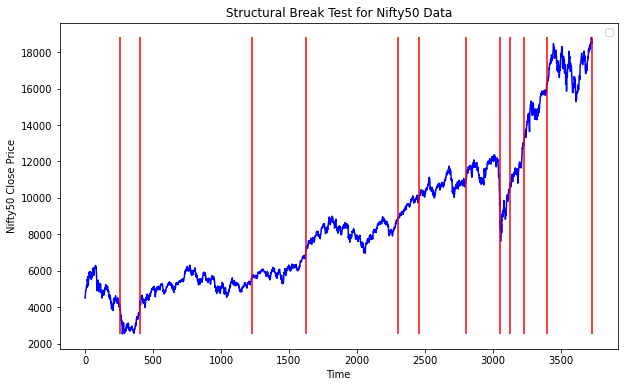

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Load Nifty50 data

# Extract the close price column
close_price = nifty_50['Close'].values

# Perform structural break test with Pelt method
algo = rpt.Pelt(model="rbf").fit(close_price)
result = algo.predict(pen=10)

# Plot the data with breakpoints
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(close_price, color='blue')
ax.vlines(result, ymin=min(close_price), ymax=max(close_price), color='red')
ax.set_xlabel('Time')
ax.set_ylabel('Nifty50 Close Price')
ax.set_title('Structural Break Test for Nifty50 Data')
ax.legend()
plt.show()




In [9]:
ax.set_xlabel('Time')
ax.set_ylabel('Nifty50 Close Price')
ax.set_title('Structural Break Test for Nifty50 Data')
ax.legend()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


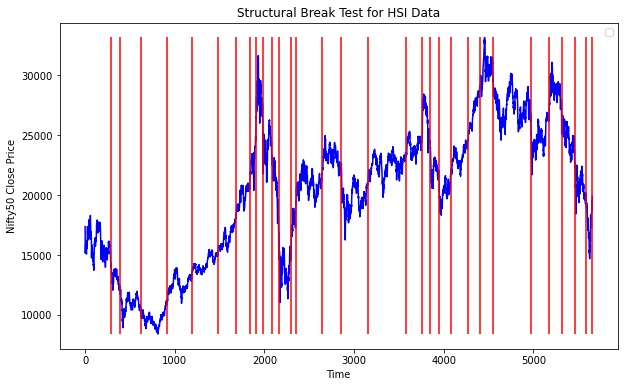

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Load Nifty50 data

# Extract the close price column
close_price = hsi['Close'].values

# Perform structural break test with Pelt method
algo = rpt.Pelt(model="rbf").fit(close_price)
result = algo.predict(pen=10)

# Plot the data with breakpoints
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(close_price, color='blue')
ax.vlines(result, ymin=min(close_price), ymax=max(close_price), color='red')
ax.set_xlabel('Time')
ax.set_ylabel('Nifty50 Close Price')
ax.set_title('Structural Break Test for HSI Data')
ax.legend()
plt.show()